In [155]:
#https://stackoverflow.com/questions/47330244/generating-random-transition-probability-matrix-python
#https://docs.python.org/3/library/random.html
#ref: https://www.datacamp.com/tutorial/markov-chains-python-tutorial

In [156]:
from Transition import Transition

[[0.22049751 0.08235201 0.69715048]
 [0.27468499 0.29342449 0.43189051]
 [0.47774157 0.22634683 0.2959116 ]]
[[0.22049751 0.08235201 0.69715048]
 [0.27468499 0.29342449 0.43189051]
 [0.47774157 0.22634683 0.2959116 ]]


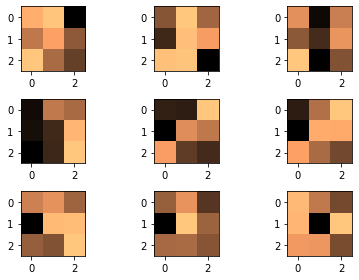

In [157]:
import datetime

Tra = Transition(3,3)

for _ in range(1):
    Tra.gen_state_prob(3, "uniform")
    M = Tra.get_transition_matrix()
    print(M)


print(M)

import numpy as np
from matplotlib import pyplot as plt
"""
plt.rcParams["figure.figsize"] = [7.00, 3.50]
plt.rcParams["figure.autolayout"] = True
im = plt.imshow(M, cmap="copper_r")
plt.colorbar(im)
plt.show()
"""
figure, axis = plt.subplots(3, 3)

for i in range(3):
    for j in range(3):
        Tra.gen_state_prob(3, "uniform")
        M = Tra.get_transition_matrix()
        plt.rcParams["figure.autolayout"] = True
        axis[i,j].imshow(M, cmap="copper_r")
        


#axis[0, 1].plot(X, Y2)
#axis[0, 1].set_title("Cosine Function")
#plt.savefig("plots/TM-heatmap-"+str(datetime.datetime.now())+".png", bbox_inches="tight")
plt.show()

## Plot State Transition Diagram

In [158]:
'''
import numpy as np
from matplotlib import pyplot as plt

# Import the MarkovChain class from markovchain.py
from markovchain import MarkovChain
P = np.array(transition_matrix)
mc = MarkovChain(P, ['left', 'straight', 'right'])
mc.draw()
'''

"\nimport numpy as np\nfrom matplotlib import pyplot as plt\n\n# Import the MarkovChain class from markovchain.py\nfrom markovchain import MarkovChain\nP = np.array(transition_matrix)\nmc = MarkovChain(P, ['left', 'straight', 'right'])\nmc.draw()\n"

## Simulate Map

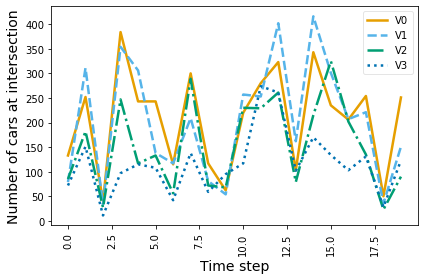

In [159]:
from MarkovProcess import MarkovChain
from Population import Population
from Simulate import Simulate

P = Population(20,0.5,0.5,30)

timeSteps = [10,50,100,150, 200, 250, 300, 350, 400, 450, 500, 550, 600, 650, 700, 750, 800, 850, 900, 950]
#timeSteps = [10,100,500,1000,1500,2000,2500,3000,3500,4000]
S = Simulate(timeSteps)

S.addCars = True        #add new cars at every time step
S.addActCars = False
S.runSimulation(P)
#S.printMap(False)
S.plotData()
Features, Labels = S.getLearningData()
#print(Labels)
#print(Features)

S.generateTestingData(100)
tFeatures, tLabels = S.getTestingData()
#print(tLabels)
#print(tFeatures)

#override features
#S.generateTestingData(1000)
#Features, Labels = S.getTestingData()

del S

In [160]:
#https://vknight.org/unpeudemath/code/2015/08/01/simulating_continuous_markov_chains.html

## Plot MarkovChain

In [161]:
'''
import pygraphviz as pgv
from IPython.display import Image

def draw(dot):
    return Image(pgv.AGraph(dot).draw(format='png', prog='dot'))

g1 = """digraph top {
   a -> b -> c;
}"""
draw(g1)
'''

'\nimport pygraphviz as pgv\nfrom IPython.display import Image\n\ndef draw(dot):\n    return Image(pgv.AGraph(dot).draw(format=\'png\', prog=\'dot\'))\n\ng1 = """digraph top {\n   a -> b -> c;\n}"""\ndraw(g1)\n'

## Decision Tree Classifier

In [162]:
from sklearn import tree
X = Features
Y = Labels
pLabels = []
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, Y)

matched = 0
for i in range(len(tFeatures)):
    #print(clf.predict([tFeatures[i]]),"-->",tLabels[i])
    if clf.predict([tFeatures[i]]) == tLabels[i]:
        matched+=1
    pLabels.append(clf.predict([tFeatures[i]])[0])
        
#print(len(pLabels), len(tLabels))
print("accuracy: ", matched/len(tFeatures))

#clf.predict([[0.3,0.2,0.5,0.1,0.4,0.5,0.6,0.3,0.1,1]])
#clf.predict_proba([[0.3,0.2,0.5,0.1,0.4,0.5,0.6,0.3,0.1,1]])

accuracy:  0.47


In [163]:
'''
import graphviz 
dot_data = tree.export_graphviz(clf, out_file=None) 
graph = graphviz.Source(dot_data) 
graph.render("traffic_tree") 
'''

'\nimport graphviz \ndot_data = tree.export_graphviz(clf, out_file=None) \ngraph = graphviz.Source(dot_data) \ngraph.render("traffic_tree") \n'

## Logistic Regression

In [164]:
from sklearn.linear_model import LogisticRegression
from sklearn import datasets, metrics

classifier = LogisticRegression()
classifier.fit(Features, Labels)
score = metrics.accuracy_score(Labels, classifier.predict(Features))
print("Accuracy: %f" % score)

Accuracy: 0.500000


https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html#sklearn.neural_network.MLPClassifier

## Neural Network MLP Classifier

data: 380
labels: 380
[0.0930272435175604, 0.7415527441146931, 0.16542001236774648, 0.29512553632324295, 0.25327916785065396, 0.45159529582610314, 0.7882424194000465, 0.0735598915186235, 0.13819768908132996, 0]
[0.280941631354966, 0.15283108374393087, 0.5662272849011031, 0.15916478309779244, 0.5575072354291296, 0.283327981473078, 0.15420126677758408, 0.7678895568333964, 0.07790917638901958, 0.5]
[0.13216084287665403, 0.5602212310738172, 0.3076179260495287, 0.30097131580733266, 0.5921965774369928, 0.10683210675567444, 0.2891521669612195, 0.6421050416980502, 0.0687427913407304, 1]
[0.1999450553222552, 0.05104545322561879, 0.749009491452126, 0.014207317629924058, 0.492644514391522, 0.49314816797855376, 0.19198444077697976, 0.4696718266859568, 0.3383437325370635, 0]
[0.7567817572745797, 0.10706509240959963, 0.13615315031582062, 0.10354524747204205, 0.7543407360606714, 0.14211401646728647, 0.24751173383385028, 0.5110271882259746, 0.24146107794017516, 1]

straight
right
left
right
left


c:\Users\aliha\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


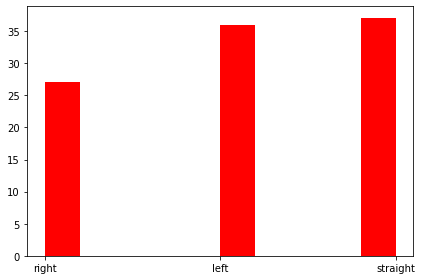

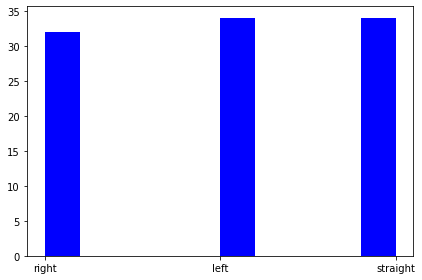

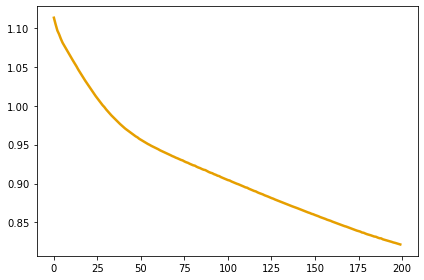

accuracy:  0.54
score: 0.6447368421052632
loss: 0.8216682040015715


In [165]:
from sklearn.neural_network import MLPClassifier
#from sklearn.preprocessing import StandardScaler 
X = Features
y = Labels
MLPpLabels = []
    

print("data:",len(X))
print("labels:",len(y))

[print(X[i]) for i in range(5)] 
print()
[print(y[i]) for i in range(5)] 

#scaler = StandardScaler()  
#scaler.fit(X)  
#X_train = scaler.transform(X)  
#X_test = scaler.transform(tFeatures)  

clf = MLPClassifier(solver='adam', 
                    alpha=0.00001,
                    #hidden_layer_sizes=(5, 2), 
                    random_state=1,
                    batch_size='auto',
                    early_stopping=False,
                    warm_start=True)

clf.fit(X, y)

matched = 0
lbl = ""
for i in range(len(tFeatures)):
    L = clf.predict([tFeatures[i]])
    if L == tLabels[i]:
        matched+=1
    MLPpLabels.append(L[0])

from matplotlib import pyplot as plt

plt.hist(tLabels, color='r')
#plt.legend()
plt.show()
plt.hist(MLPpLabels, color='b')
plt.show()
#print("tLabels", tLabels)
#print("MLPpLabels", MLPpLabels)

plt.plot(clf.loss_curve_, label="loss")
#plt.plot(clf.best_validation_score_, label="validation")

#plt.legend(True)
plt.show()

print("accuracy: ", matched/len(tFeatures))
print("score:", clf.score(Features, Labels))
print("loss:", clf.loss_)

#clf.predict_proba([[2., 2.], [1., 2.]])

## Confusion Matrix

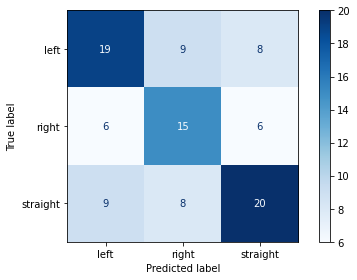

In [166]:
def labelToNum(lbls):
    temp = []
    for i in lbls:
        if i == 'left': temp.append(0)
        elif i == 'straight': temp.append(0.5)
        elif i == 'right' : temp.append(1)
    return temp

import matplotlib.pyplot as plt
import numpy
from sklearn import metrics
import datetime

actual = tLabels
predicted = pLabels

#confusion_matrix = metrics.confusion_matrix(actual, predicted, labels=clf.classes_)#["left", "straight", "right"])
confusion_matrix = metrics.confusion_matrix(actual, MLPpLabels, labels=clf.classes_)#["left", "straight", "right"])
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = clf.classes_)#[False, True])

cm_display.plot(cmap = 'Blues')
#plt.savefig("plots/confusion-matrix-"+str(datetime.datetime.now())+".png", bbox_inches="tight")
plt.show() 

In [167]:
#LATEST 01/19